## AI 初探-如何使用Microsoft Custom Vision服務
在這個主題中, 我們要教大家如何使用 Microsoft Custom Vision 服務. 這個服務等於是把訓練模型的這件事交給專家(Microsoft)處理, 微軟也提供了一個便利的介面讓使用者上傳自己的資料.

以下的操作都是建立在已經擁有 Microsoft Azure 帳號並開通 CusomVision 服務的情況下. 首先到 https://www.customvision.ai 並登入.  

登入帳號為 {你的itouch帳號}@o365st.cycu.edu.tw, 密碼是你的itouch密碼.

登入後會有操作提示, 提醒使用者開啟一個新的專案.

<img src='assets/step1.png' width=500></img>

開啟後要選擇一個專案名稱(自取), 幾個屬性我們稍微說明一下.
- Resource Group: 代表提供這個服務的虛擬機器，請根據你的電腦名稱選擇正確的群組名稱(例如, 電腦編號是cycu002的組別請選擇cvst02)
- Project Types: 想要學習的問題. Classification 是分類問題, Object detection 是偵測圖片中的物體. 如果是 detection, 必須標記出想要偵測的物體在圖片的哪一個位置.
- Classification Types: 如果一張圖片中有一個以上的分類就要選 Multilabel, 只有一種物件就選 Multiclass, 本範例中請選擇 Multiclass
- Domains: 這就好像模型的先備知識一樣, 如果選對了機器會學習的比較好(也就是比較準). 如果想要一個通用的模型就是選 general. 後面帶有 compact 字樣的表示是採用比較精簡的模型, 通常是為了給運算能力較差的裝置使用的. 後果就是辨識率會稍微差一些, 但對於不複雜的問題還是有不錯的辨識度. 而且 compact 模型可以匯出成 Tensorflow 的 .pb 檔, 就可以把模型檔案下載下來後在其他的裝置上執行

選完以後就可以建立專案.

<img src='assets/step2.png' width=500></img>

建好專案後就可以開始上傳資料. 這邊我們用Kaggle上的經典問題:[貓狗大戰](https://www.kaggle.com/c/dogs-vs-cats)的資料集做練習. 這個資料集總共有50000張貓跟狗的圖片, 這邊我們已準備了一個比較小範圍的資料集, 只有2000張的貓狗圖片集(在dataset資料夾內), 請從裡面挑出貓的照片並上傳.

<img src='assets/step3.png' width=500></img>

添加完照片後請在下面設定這些照片的標籤(tag)名稱.

<img src='assets/step4.png' width=500></img>

添加完貓的照片後再用同樣的方式增加狗的照片. 可以點擊左上角的按鈕繼續增加照片並附上標籤.

<img src='assets/step5.png' width=400></img>

上傳完貓跟狗的照片後, 點選右上角的綠色按鈕開始訓練. 因為這個資料集並不太複雜, 訓練方式直接選擇 Fast training.

<img src='assets/step6.png' width=500></img>

訓練完後再Performance分頁可以看到模型分類的結果.

<img src='assets/step7.png' width=500></img>

這邊訓練的結果有三個屬性.

* Precision - 精確率, 意思是在所有被模型判斷成該物體的資料中真正正確的物件所佔的比例
* Recall - 召回率, 在所有該物件的資料中被模型判斷出來的比例
* AP - average precision的縮寫. ap 的評估是用在偵測(detection)問題上, 我們目前是處理分類問題, 因此這個數字沒有意義.

例如, 我有100張狗跟100張貓的照片，其中有110張被機器判斷成狗, 這些被判斷成狗的照片裡面真正是狗的照片有90張, 那 precision 就是 90/110, 而 recall 是 90/100.

你還可以選訓練按鈕右邊的勾勾(Quick Test)即時的測試模型的辨認結果.

<img src='assets/step14.png' width=600></img>

如果對模型的分類結果不滿意, 你可以再加入更多的照片, 或是調整資料集的內容後重新訓練. 訓練完畢後就可以按左上角的勾勾選擇要發布(publish)這個模型.此時請選擇一個發布的名稱.

<img src='assets/step8.png' width=500></img>

## 下載你的模型
如果你之前選擇的是 compact 模型, 訓練完後會有 Export 的選項可以選擇, 這邊可以讓我們把模型下載到本機端.

<img src='assets/step11.png' width=500></img>

選 Export 後請選擇 Tensorflow

<img src='assets/step12.png' width=500></img>

在紅框位置先選Export, CustomVision就會開始打包模型, 打包完後就可以下載.

<img src='assets/step13.png' width=500></img>

下載完後的檔案會是一個壓縮檔, 解壓縮後裡面有兩個檔案 model.pb 跟 labels.txt. model.pb 檔舊式模型的參數, labels.txt 記錄了類別的名稱.  

此時你已經可以把這麼檔案拿去別的程式中使用了.

### 總結
這一個單元你學會了如何操作 Custom Vision 訓練模型並下載模型


### 練習：
1. 開啟一個專案, 取名叫做group-{xx} (xx是你的組別)
2. 上傳 dataset/cat-vs-dogs 資料夾內的影像並設定標籤(tag)
3. 訓練模型
4. 自行使用一些貓狗的圖片, 線上測試你的模型
5. 下載模型
6. 在自己的電腦上測試下載的模型

### 問題：
1. 在沒有提供貓或狗的照片下，電腦的判斷成甚麼？這是合理的判斷嗎？你覺得要怎麼處理比較好？
2. 多加一到二種動物(例如, 雞)然後用custom vision訓練模型(請自行蒐集網路圖片)，或是建立一個叫做「其他」的類別 (如果是這樣，你要怎麼定義什麼圖片叫做「其他」?)
3. 請試著找一些會讓模型辨認失敗的圖片並探討可能的原因.

### 延伸閱讀：透過 Web API (網路應用程序) 呼叫使用你的模型
使用web api呼叫的方式的優點是你可以在任何應用(例如, 網頁或是手機App)都可以使用同樣的服務，而不需要一直到處複製模型檔案. 因此這邊示範一下如何使用web api呼叫的方式使用你訓練的模型.  
在使用之前, 我們要先準備好測試的圖片. 如同之前的範例, 我們從網路上找一些照片來測試.

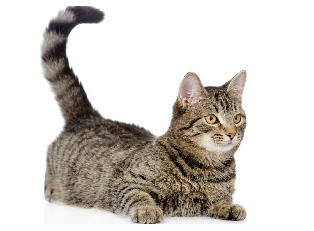

In [2]:
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import requests

# you can get new images by replacing the string in get() function.
response = requests.get("https://www.petmd.com/sites/default/files/what-does-it-mean-when-cat-wags-tail.jpg")

if not response.ok:
    print(response)
im_data = response.content

im = Image.open(BytesIO(im_data))
plt.imshow(im)
plt.axis('off')
plt.show()

取下來的資料我們放在 `im_data` 這個變數裡面, 等一下直接丟給 Custom Vision 服務.

要如何使用這個模型呢? Custom Vision 是設計成 Web api call 的方式, 也就是說微軟會提供一個網址(稱為 endpoint), 輸入這個網址, 把我們要測試的圖片丟給它, 就會傳回辨認的結果.我們可以點擊箭頭指的地方來獲得 endpoint.

<img src='assets/step9.png' width=500></img>

點擊以後就會出現使用的 endpoint, 以及相關的參數設定.

<img src='assets/step10.png' width=500></img>

大家可以把下面的程式區塊跟上面的圖對照一下, 就可以知道設定的方式. 因為不同的帳號, endpoint 跟 Prediction-Key 都不太一樣, 因此讀者需要把下面的資料置換成自己帳號的設定的 endpoint 跟 prediction-key.

In [6]:
url = 'https://southeastasia.api.cognitive.microsoft.com/customvision/v3.0/Prediction/ff019354-7ae7-4d4f-bed7-214a3f58965b/classify/iterations/cats-vs-dog/image'
headers = {
'Content-Type':'application/octet-stream',
'Prediction-Key':'{YOUR_PREDICTION_KEY}',
}

設定完後就使用下面的程式呼叫 Custom Vision 服務. 成功的話會看到 *successfully get prediction result* 字樣. 
註:這邊你不需要對影像作任何處理(正規化, 縮放等), Custom Vision服務會自動幫你處理.

In [7]:
response = requests.post(url=url,data =im_data,headers=headers)

if response.ok:
    print('successfully get prediction result.')

successfully get prediction result.


回傳回來的預測資料會是 json 格式. 這是一個網路資料交換的標準格式. 你可以到[這裡](https://zh.wikipedia.org/wiki/JSON)看到更多關於這種格式的資訊. 它的結構組成非常簡單, 是一種 key-value 的配對方式, 我們可以用下面的程式片段來把結果轉換成 python 支援的字典(dict)格式. 

In [8]:
import json
j = json.loads(response.content)
print(json.dumps(j,indent=4))

{
    "id": "ab2a0942-5ec1-4982-a5de-ce9324191630",
    "project": "ff019354-7ae7-4d4f-bed7-214a3f58965b",
    "iteration": "2da76d07-1087-4354-b65e-f728bf168a9f",
    "created": "2019-06-21T13:11:23.007Z",
    "predictions": [
        {
            "probability": 1.0,
            "tagId": "61748b60-665e-48cf-bc16-d96936701fee",
            "tagName": "cat"
        },
        {
            "probability": 1.67265544e-14,
            "tagId": "8ce2410e-9f2d-462c-92cc-f7145771b62d",
            "tagName": "dog"
        }
    ]
}


直接觀察上面的列印結果, 我們就會看到預測的結果被放在 predictions 下, 每個類別都有一個預測的機率, 所以我們單純的挑出機率最大的那個就是最後的預測結果.

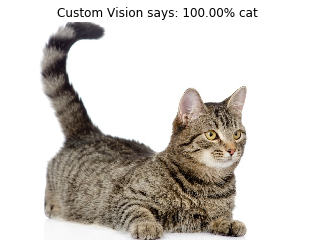

In [10]:
prob = 0
tagName = 'None'
for obj in j['predictions']:
    if obj['probability'] > prob:
        tagName = obj['tagName']
        prob = obj['probability']

im = Image.open(BytesIO(im_data))
plt.imshow(im)
plt.title('Custom Vision says: {:.2f}% '.format(prob*100) + tagName)
plt.axis('off')
plt.show()